# Activitat 3: Similitud Molecular amb RDKit

# **Anàlisi de Similitud de la Naltrexona**

## Bioinformàtica - UF3 

    
+ **Nom alumn@:**
+ **Data d'entrega:** 

*NOTA1: Per cada dia d'entrega més tard es descomptarà un 10% de la nota de la pràctica.*

*NOTA2: L'script s'ha d'executar sense errors i produir els resultats, fitxers i figures que es demanen. És aconsellable abans d'entregar reiniciar el kernel del notebook (Kernel > Restart Kernel) i comprovar que totes les cel·les del notebook s'executen sense errors una rere l'altre.* 
***

La [naltrexona](https://es.wikipedia.org/wiki/Naltrexona) és un fàrmac antagonista dels [receptors opioides](https://en.wikipedia.org/wiki/Opioid_receptor) (GPCRs), molt utilitzat en el tractament de la intoxicació per opioides (codeïna, morfina i heroïna), de forma que bloqueja els receptors i n'evita els efectes de l'activitat d'aquests. També s'utilitza en el tractament de la síndrome d'abstinència a l'alcohol. 

L'objectiu d'aquesta activitat és trobar molècules que s'assemblin estructuralment a la `naltrexona` en una base de dades de molècules que ja existeixen al mercat, per poder detectar si podrien tenir la mateixa funció. 

[DrugBank](https://go.drugbank.com/) és una base de dades de fàrmacs aprovats per la FDA (Food and Drug Administration, Agència del medicament dels EEUU). En aquesta activitat, treballarem amb una col·lecció de fàrmacs (`approved subset`) provinents d'aquesta base de dades. Podem descarregar el fitxer `drugbank_approved_structures.sdf` en format `SDF`(el teniu al MOODLE a l’apartat de l’Activitat 2).

**Importa els mòduls necessaris**

In [1]:
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import DataStructs
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import SDMolSupplier
from rdkit.Chem import MolToSmiles
from rdkit.Chem import PandasTools
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Desactivem els warnings i errors de rdkit per una major claredat en el notebook.
from rdkit import rdBase
rdBase.DisableLog('rdApp.warning')
rdBase.DisableLog('rdApp.error')

## 1. Similitud de la `naltrexona`amb la base de dades de DrugBank

**1.a) Introdueix la molècula de la `naltrexona` identificant-la amb el nom.** [0.25 punts]

_**Nota:**_ es poden importar en qualsevol format ja sigui mol, sdf, Inchi, InchiKey o SMILES

In [3]:
supplier = Chem.SDMolSupplier('./drugbank_approved_structures.sdf')

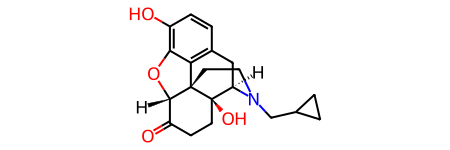

In [4]:
molecules = [mol for mol in supplier if mol is not None]

for mol in molecules:
    if mol.GetProp('GENERIC_NAME') == 'Naltrexone':
        break
naltrexona = mol
naltrexona

**1.b) Calcula els fingerprints de MACCS i Morgan per a la `naltrexona`.** [1 punt]

Funcions per calcular i comparar fringerprints:

In [5]:
def calcula_maccs_fringerprint(mol):
    fp = MACCSkeys.GenMACCSKeys(mol)
    return (fp)
def calcula_morgan_fringerprint(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    return (fp)
def comparar_fingerprints(fp1, fp2):
    similitud = DataStructs.TanimotoSimilarity(fp1, fp2)
    return similitud

Fringerprints de la Naltrexona:

In [6]:
maccs_naltrexona = calcula_maccs_fringerprint(naltrexona)
morgan_naltrexona = calcula_morgan_fringerprint(naltrexona)

**1.c) Llegeix l'arxiu de molècules de DrugBank i afegeix el nom a cada molècula per a que correspongui amb el seu nom genèric.** [0.75 punts]

_**Nota:**_ el camp "GENERIC_NAME" es troba a la _data_ del sdf

In [7]:
# molecules = [mol for mol in supplier if mol is not None]
mol_with_generic_names = []
for mol in molecules:
    if mol is not None:
        generic_name = mol.GetProp('GENERIC_NAME')
        mol.SetProp('GENERIC_NAME', generic_name)# Afegeix el nom genèric com a propietat de la molècula
        mol_with_generic_names.append(mol)

# Converteix la llista de molècules a un DataFrame de Pandas
df = PandasTools.LoadSDF('./drugbank_approved_structures.sdf')

# Afegeix les molècules amb els noms genèrics al DataFrame
df_with_generic_names = pd.DataFrame(mol_with_generic_names)

# Mostrem el DataFrame amb els noms genèrics afegits
df_with_generic_names

,0
0,<rdkit.Chem.rdchem.Mol object at 0x0000020C48B...
1,<rdkit.Chem.rdchem.Mol object at 0x0000020C48B...
2,<rdkit.Chem.rdchem.Mol object at 0x0000020C48B...
3,<rdkit.Chem.rdchem.Mol object at 0x0000020C48B...
4,<rdkit.Chem.rdchem.Mol object at 0x0000020C48B...
...,...
2347,<rdkit.Chem.rdchem.Mol object at 0x0000020C48C...
2348,<rdkit.Chem.rdchem.Mol object at 0x0000020C48C...
2349,<rdkit.Chem.rdchem.Mol object at 0x0000020C48C...
2350,<rdkit.Chem.rdchem.Mol object at 0x0000020C48C...


**1.d) Calcula els fingerprints de MACCS i Morgan per a cada molècula de DrugBank. Calcula també la similitud (el coeficient de Tanimoto) respecte a la naltrexona i afegeix aquest valor com a nou camp al sdf.** [2 punts]

_**Nota:**_ Recorda que tot el que es carrega i descarrega de la _data_ del sdf es en string

In [8]:
mol_with_properties = []

# Processa cada molècula de l'arxiu
for mol in molecules:
    if mol is not None:
        # Calcula el fingerprint de MACCS
        maccs_fingerprint = calcula_maccs_fringerprint(mol)
        
        # Calcula el fingerprint de Morgan
        morgan_fingerprint = calcula_morgan_fringerprint(mol)
        
        # Calcula la similitud amb la naltrexona utilitzant el coeficient de Tanimoto
        similarity_naltrexona = comparar_fingerprints(maccs_fingerprint, calcula_maccs_fringerprint(naltrexona))
        
        # Afegeix els nous camps com a propietats de la molècula
        mol.SetProp('MACCS_FINGERPRINT', DataStructs.BitVectToText(maccs_fingerprint))
        mol.SetProp('MORGAN_FINGERPRINT', DataStructs.BitVectToText(morgan_fingerprint))
        mol.SetProp('SIMILARITY_NALTREXONA', str(similarity_naltrexona))
        
        # Afegeix la molècula amb els nous camps a la llista
        mol_with_properties.append(mol)

# Escriu les molècules amb els nous camps a un nou arxiu SDF
output_sdf_file = './modificate_drugbank.sdf'  # Canvia la ruta al teu nou arxiu SDF
writer = Chem.SDWriter(output_sdf_file)

for mol in mol_with_properties:
    writer.write(mol)

writer.close()

**1.e) Ordena els fàrmacs segons la similitud amb la naltrexona respecte a cadascun dels fingerprints. A continuació, mostra l'estructura, el nom i el valor de similitud per als 5 fàrmacs més semblants a la naltrexona segons cadascun dels fingerprints.** [1 punt]

MACCS:

In [9]:
llista_similituds_maccs = []
molecules_sorted_bySimilarity_maccs = []

for mol in molecules:
    maccs_mol = calcula_maccs_fringerprint(mol)
    similarity = comparar_fingerprints(maccs_naltrexona, maccs_mol)
    llista_similituds_maccs.append(similarity)
    molecules_sorted_bySimilarity_maccs.append((similarity, mol))

# Ordena les molècules segons les similituds amb la naltrexona utilitzant els fingerprints MACCS
molecules_sorted_bySimilarity_maccs.sort(key=lambda x: x[0], reverse=True)

# Mostra les 5 molècules més semblants amb els seus noms i similituds utilitzant els fingerprints MACCS
print("Top 5 molècules més semblants amb MACCS:")
for idx in range(5):
    similarity, mol = molecules_sorted_bySimilarity_maccs[idx]
    print(f"Molecule Name: {mol.GetProp('GENERIC_NAME')}\t\t Similarity Score: {similarity}")

Top 5 molècules més semblants amb MACCS:
Molecule Name: Naltrexone		 Similarity Score: 1.0
Molecule Name: Naloxone		 Similarity Score: 0.9454545454545454
Molecule Name: Nalbuphine		 Similarity Score: 0.9444444444444444
Molecule Name: Nalmefene		 Similarity Score: 0.8947368421052632
Molecule Name: Methylnaltrexone		 Similarity Score: 0.8833333333333333


Morgan:

In [10]:
llista_similituds_morgan = []
molecules_sorted_bySimilarity_morgan = []

for mol in molecules:
    morgan_mol = calcula_morgan_fringerprint(mol)
    similarity = comparar_fingerprints(morgan_naltrexona, morgan_mol)
    llista_similituds_morgan.append(similarity)
    molecules_sorted_bySimilarity_morgan.append((similarity, mol))

# Ordena les molècules segons les similituds amb la naltrexona utilitzant els fingerprints Morgan
molecules_sorted_bySimilarity_morgan.sort(key=lambda x: x[0], reverse=True)

# Mostra les 5 molècules més semblants amb els seus noms i similituds utilitzant els fingerprints Morgan
print("\nTop 5 molècules més semblants amb Morgan:")
for idx in range(5):
    similarity, mol = molecules_sorted_bySimilarity_morgan[idx]
    print(f"Molecule Name: {mol.GetProp('GENERIC_NAME')}\t\t Similarity Score: {similarity}")


Top 5 molècules més semblants amb Morgan:
Molecule Name: Naltrexone		 Similarity Score: 1.0
Molecule Name: Nalmefene		 Similarity Score: 0.7966101694915254
Molecule Name: Naloxone		 Similarity Score: 0.7540983606557377
Molecule Name: Oxymorphone		 Similarity Score: 0.711864406779661
Molecule Name: Nalbuphine		 Similarity Score: 0.6307692307692307


## 2. Bioactivitat dels fàrmacs semblants a la `naltrexona`

Quan comparem molècules, esperem que aquelles molècules que més s'assemblen tinguin funcions similars i per tant, que interaccionin amb les mateixes proteïnes. En aquest exercici, mirarem si els fàrmacs més semblants a la naltrexona interaccionen amb les mateixes proteïnes que la naltrexona.

Per a respondre a aquesta pregunta descarregarem les dades d'activitat de la base de dades [DrugCentral](https://drugcentral.org/) que ja vam veure a l'activitat 1. Teniu la taula al MOODLE amb el nom de Database DrugCentral des d'on es descarrega el fitxer `drug_target_interaction.tsv`.

**2.a) Fes una única llista i que no contingui repeticions dels fàrmacs més semblants a la naltrexona considerant els 5 primers fàrmacs segons els dos fingerprints calculats. Mostra el nom dels fàrmacs.** [1 punt]

In [11]:
# Per aquesta tasca, necessitarem utilitzar les llistes molecules_sorted_bySimilarity_maccs i molecules_sorted_bySimilarity_morgan que vam calcular abans i unir els noms dels 5 primers fàrmacs més 
# semblants amb cada fingerprint. Després, eliminarem les duplicacions per obtenir una única llista.

# Obtenir els noms dels 5 primers fàrmacs més semblants amb MACCS
top5_maccs = [mol.GetProp('GENERIC_NAME') for similarity, mol in molecules_sorted_bySimilarity_maccs[:5]]

# Obtenir els noms dels 5 primers fàrmacs més semblants amb Morgan
top5_morgan = [mol.GetProp('GENERIC_NAME') for similarity, mol in molecules_sorted_bySimilarity_morgan[:5]]

# Unir les dues llistes i eliminar duplicacions
farms_similars_no_rep = list(set(top5_maccs + top5_morgan))

# Mostrar el nom dels fàrmacs sense repeticions
print("Noms dels fàrmacs més semblants a la naltrexona (sense repeticions):")
for farm in farms_similars_no_rep:
    print(farm)

Noms dels fàrmacs més semblants a la naltrexona (sense repeticions):
Methylnaltrexone
Nalbuphine
Oxymorphone
Nalmefene
Naloxone
Naltrexone


**2.b) Carrega la taula `drug_target_interaction.tsv`.** [1 punt]

**Després:**
- **Limita la taula a les columnes: `DRUG_NAME`, `TARGET_NAME`, `TARGET_CLASS`, `ACT_VALUE`, `ORGANISM`.**
- **Limita la taula a les files corresponents als fàrmacs de l'exercici anterior a la columna `DRUG_NAME`. Atenció amb les majúscules!**
- **Elimina les files que no tenen dades (_missing values_) per a la columna `ACT_VALUE`** 

In [12]:
drug_target_df = pd.read_csv('./drug_target_interaction.tsv', sep='\t', low_memory=False)

# Limitar la taula a les columnes especificades
selected_columns = ['DRUG_NAME', 'TARGET_NAME', 'TARGET_CLASS', 'ACT_VALUE', 'ORGANISM']
drug_target_df = drug_target_df[selected_columns]

# Obtenir els noms dels fàrmacs més semblants sense repeticions
selected_drugs = list(set(top5_maccs + top5_morgan))
selected_drugs = [drug.upper() for drug in selected_drugs]
#print(selected_drugs)

# Limitar la taula als fàrmacs seleccionats
drug_target_df['DRUG_NAME'] = drug_target_df['DRUG_NAME'].str.upper()
drug_target_df = drug_target_df[drug_target_df['DRUG_NAME'].isin(selected_drugs)]
#print(drug_target_df)

# Eliminar files amb dades mancants (missing values) per a la columna ACT_VALUE
drug_target_df = drug_target_df.dropna(subset=['ACT_VALUE'])

# Mostrar la taula resultant
drug_target_df

,DRUG_NAME,TARGET_NAME,TARGET_CLASS,ACT_VALUE,ORGANISM
7299,NALTREXONE,Delta-type opioid receptor,GPCR,7.99000,Homo sapiens
7300,NALTREXONE,Kappa-type opioid receptor,GPCR,8.93000,Homo sapiens
7301,NALTREXONE,Cytochrome P450 2D6,Enzyme,6.00000,Homo sapiens
7302,NALTREXONE,Mu-type opioid receptor,GPCR,9.38000,Homo sapiens
7303,NALTREXONE,Kappa-type opioid receptor,GPCR,9.51000,Cavia porcellus
7304,NALTREXONE,Kappa-type opioid receptor,GPCR,8.84000,Mus musculus
7305,NALTREXONE,Neuronal acetylcholine receptor subunit alpha-7,Ion channel,4.60000,Homo sapiens
7306,NALTREXONE,Neuronal acetylcholine receptor subunit alpha-4,Ion channel,4.51000,Rattus norvegicus
7307,NALTREXONE,Delta-type opioid receptor,GPCR,7.91000,Mus musculus
7308,NALTREXONE,Mu-type opioid receptor,GPCR,9.77000,Cavia porcellus


**2.c) Quines són les proteïnes (`TARGET_NAME`) amb les que interacciona la naltrexona?** [0.5 punts]

In [13]:
# Filtrar la taula per la naltrexona
naltrexona_interactions = drug_target_df[drug_target_df['DRUG_NAME'] == 'NALTREXONE']

# Mostrar les proteïnes amb les quals interactua la naltrexona
proteins_interacted_with_naltrexona = naltrexona_interactions['TARGET_NAME'].unique()
print("Proteïnes amb les quals interacciona la naltrexona:")
for protein in proteins_interacted_with_naltrexona:
    print(protein)


Proteïnes amb les quals interacciona la naltrexona:
Delta-type opioid receptor
Kappa-type opioid receptor
Cytochrome P450 2D6
Mu-type opioid receptor
Neuronal acetylcholine receptor subunit alpha-7
Neuronal acetylcholine receptor subunit alpha-4
Opioid receptor
Opioid receptors; mu and delta


**2.d) Com veus, la naltrexona interacciona principalment amb els receptors opioids. Entre els fàrmacs seleccionats a l'apartat 2a (els que més s'assemblen a la naltrexona), per a quins hi ha dades de bioactivitat en algun receptor opioide? Crea una taula en que la columna `TARGET_NAME` estigui limitada als receptors opioides.** [0.5 punt]

*PISTA: Una de les estratègies pot ser comprobar si hi ha una paraula determinada a una columna determinada, però pots escollir fer-ho com millor trobis.*

In [14]:
# Filtrar la taula per els fàrmacs seleccionats
selected_drugs_interactions = drug_target_df[drug_target_df['DRUG_NAME'].isin(selected_drugs)]

# Filtrar la taula pels receptors opioids
opioid_receptors_interactions = selected_drugs_interactions[selected_drugs_interactions['TARGET_NAME'].str.contains('OPIOID', case=False, na=False)]

# Mostrar la taula resultant amb la columna TARGET_NAME limitada als receptors opioids
opioid_receptors_interactions[['DRUG_NAME', 'TARGET_NAME', 'TARGET_CLASS', 'ACT_VALUE', 'ORGANISM']]

,DRUG_NAME,TARGET_NAME,TARGET_CLASS,ACT_VALUE,ORGANISM
7299,NALTREXONE,Delta-type opioid receptor,GPCR,7.9900,Homo sapiens
7300,NALTREXONE,Kappa-type opioid receptor,GPCR,8.9300,Homo sapiens
7302,NALTREXONE,Mu-type opioid receptor,GPCR,9.3800,Homo sapiens
7303,NALTREXONE,Kappa-type opioid receptor,GPCR,9.5100,Cavia porcellus
7304,NALTREXONE,Kappa-type opioid receptor,GPCR,8.8400,Mus musculus
7307,NALTREXONE,Delta-type opioid receptor,GPCR,7.9100,Mus musculus
7308,NALTREXONE,Mu-type opioid receptor,GPCR,9.7700,Cavia porcellus
7309,NALTREXONE,Opioid receptor,GPCR,9.2600,Rattus norvegicus
7310,NALTREXONE,Opioid receptors; mu and delta,GPCR,9.0600,Mus musculus
7311,NALTREXONE,Mu-type opioid receptor,GPCR,9.5800,Mus musculus


**2.e) Els valors de bioactivitat (`ACT_VALUE`) indiquen la potència amb la que un fàrmac interacciona amb una proteïna. Calcula la mitjana (`mean`) dels valors de bioactivitat de tots els fàrmacs de drugbank amb els receptors opioides  i ordena'ls de més potent a menys. Crea un gràfic que ho il·lustri on es mostri tambè la bioactivitat de la naltrexona.** [1 punt]

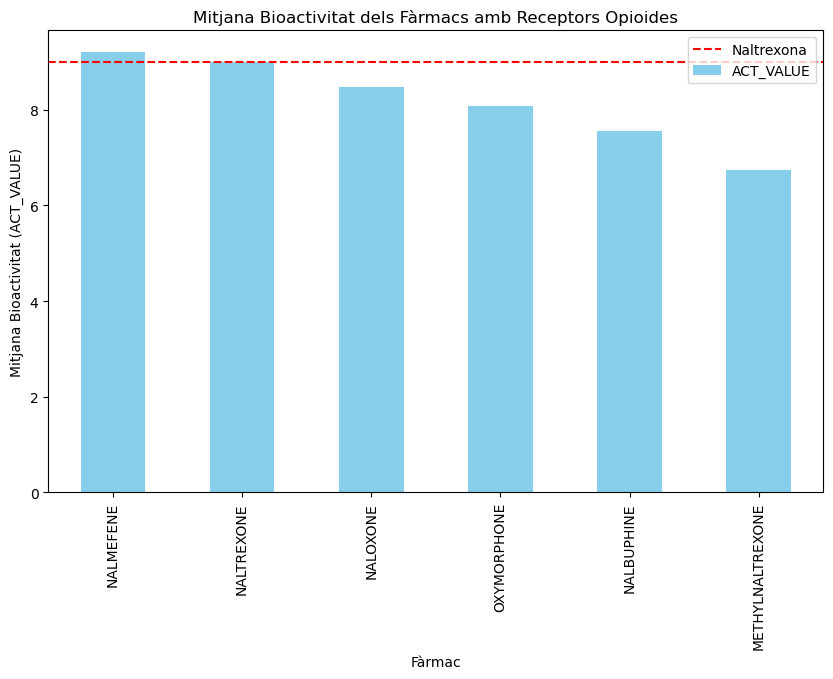

In [15]:
# Calcular la mitjana dels valors de bioactivitat per als receptors opioids
mean_activity_values = opioid_receptors_interactions.groupby('DRUG_NAME')['ACT_VALUE'].mean()

# Ordenar els fàrmacs de més potent a menys
sorted_mean_activity_values = mean_activity_values.sort_values(ascending=False)

# Crear el gràfic
plt.figure(figsize=(10, 6))
sorted_mean_activity_values.plot(kind='bar', color='skyblue')
plt.axhline(y=opioid_receptors_interactions[opioid_receptors_interactions['DRUG_NAME']=='NALTREXONE']['ACT_VALUE'].mean(), color='red', linestyle='--', label='Naltrexona')

# Afegir etiquetes i títol
plt.xlabel('Fàrmac')
plt.ylabel('Mitjana Bioactivitat (ACT_VALUE)')
plt.title('Mitjana Bioactivitat dels Fàrmacs amb Receptors Opioides')
plt.legend()

# Mostrar el gràfic
plt.show()

## 3. Anàlisis de similitud vs. activitat

> **No sempre compostos similars tenen activitats similars ni compostos amb activitats similars s'assemblen.**

**3.a) Quin és el fàrmac més similar a la `naltrexona` (segons MACCS o Morgan) que no te activitat coneguda amb els receptors opioides ? Diubuixa'n l'estructura.** [0.5 punts]

**3.b) Quin és el fàrmac més diferent a la `naltrexona` amb activitat coneguda amb els receptors opioides ?. Dibuixa'n l' estructura.** [0.5 punts]

Aqui podem veure la molecula Naltrexone, així ens serveix per comparar amb els resulltats del exercici.

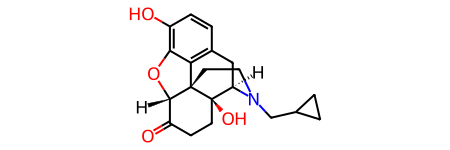

In [16]:
naltrexona

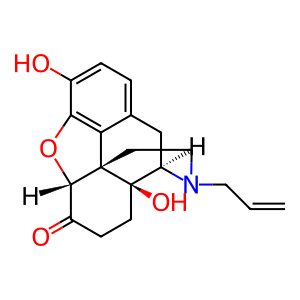

In [17]:
# Trobar el fàrmac més similar que no té activitat coneguda amb els receptors opioids (segons MACCS)
most_similar_no_activity_maccs = None
max_similarity_no_activity_maccs = 0

for mol in molecules:
    maccs_mol = calcula_maccs_fringerprint(mol)
    similarity = comparar_fingerprints(maccs_naltrexona, maccs_mol)
    
    # Comprovar si el fàrmac no té activitat coneguda amb els receptors opioids i no sigui la naltrexone
    if mol.GetProp('GENERIC_NAME') != 'Naltrexone' and \
       mol.GetProp('GENERIC_NAME') not in opioid_receptors_interactions['DRUG_NAME'].values and \
       similarity > max_similarity_no_activity_maccs:
        most_similar_no_activity_maccs = mol
        max_similarity_no_activity_maccs = similarity

# Dibuixar l'estructura del fàrmac més similar sense activitat coneguda (segons MACCS)
#print(f"Similaritat: {max_similarity_no_activity_maccs}")
Chem.Draw.MolToImage(most_similar_no_activity_maccs)

OXYMORPHONE



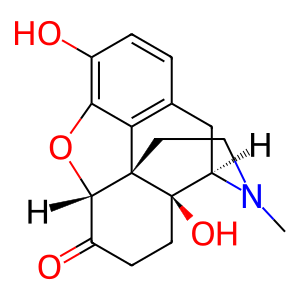

In [37]:
# Trobar el fàrmac més diferent amb activitat coneguda als receptors opioids (segons MACCS)
most_different_with_activity_maccs = None
min_similarity_with_activity_maccs = 1  # Inicialitzar amb un valor superior al màxim de similitud possible (1)

for mol in molecules:
    maccs_mol = calcula_maccs_fringerprint(mol)
    similarity = comparar_fingerprints(maccs_naltrexona, maccs_mol)

    # Comprovar si el fàrmac té activitat coneguda als receptors opioids
    mol_generic_name = mol.GetProp('GENERIC_NAME').upper()  # Convertir a majúscules
    if mol_generic_name in opioid_receptors_interactions['DRUG_NAME'].values and similarity < min_similarity_with_activity_maccs:
        most_different_with_activity_maccs = mol
        min_similarity_with_activity_maccs = similarity
print("OXYMORPHONE\n")
Chem.Draw.MolToImage(most_different_with_activity_maccs)